In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<p>Lets divide the the dataset into categorical and contious dataset</p>

In [5]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [6]:
ctg_df = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
             'work_type', 'Residence_type', 'smoking_status', 'stroke']]

cnt_df = df[['age', 'avg_glucose_level', 'bmi', 'stroke']]


<h4>Analysing the categorical data</h4>

In [7]:
ctg_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [8]:
df[ctg_df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


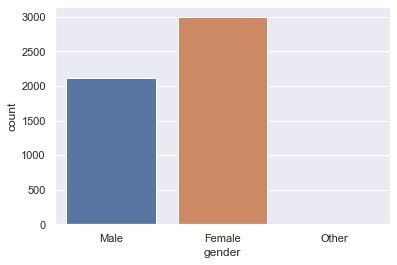

In [27]:
sns.set_theme(style='darkgrid')
sns.countplot(data=ctg_df, x='gender')
plt.show()

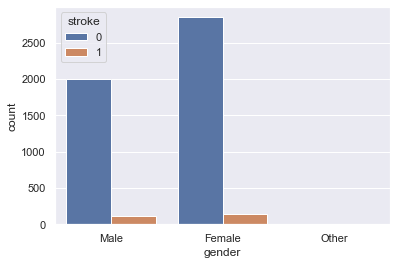

In [28]:
sns.countplot(data=ctg_df, x='gender', hue='stroke')
plt.show()

<p>By observing the graphs we can tell that there is not much relationship between gender and having stroke but lets make a pivot table to make it more easy to understand</p>

In [11]:
gender_counts = ctg_df.pivot_table(index='stroke', columns='gender', values='work_type',
                                   aggfunc='count',dropna=False, margins=True)

gender_counts

gender,Female,Male,Other,All
stroke,,,,
0,2853.0,2007.0,1.0,4861
1,141.0,108.0,NaN,249
All,2994.0,2115.0,1.0,5110


In [12]:
gender_counts['Female_stroke_rate'] = (gender_counts['Female']/gender_counts['All'])*100
gender_counts['Male_stroke_rate'] = (gender_counts['Male']/gender_counts['All'])*100

In [13]:
gender_counts

gender,Female,Male,Other,All,Female_stroke_rate,Male_stroke_rate
stroke,,,,,,
0,2853.0,2007.0,1.0,4861,58.691627,41.287801
1,141.0,108.0,NaN,249,56.626506,43.373494
All,2994.0,2115.0,1.0,5110,58.590998,41.389432


<h4>We can say that although it may seem like Female has greater chances of having stroke it is not statistically significant. Because females have a higher chances of having a stroke and also not having a stroke than male. So they counter each other</h4>
<h4>We can probably delete this feature when building models as gender probably does not effect stroke that much</h4>

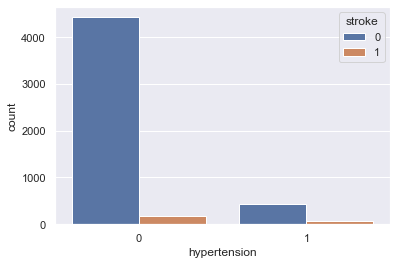

In [29]:
sns.countplot(data=ctg_df, x='hypertension', hue='stroke')
plt.show()

In [15]:
hyper_counts = ctg_df.pivot_table(index='stroke', columns='hypertension', values='work_type',
                                   aggfunc='count',dropna=False, margins=True)

hyper_counts

hypertension,0,1,All
stroke,,,
0,4429,432,4861
1,183,66,249
All,4612,498,5110


In [16]:
hyper_counts['no_tension_stroke_rate'] = (hyper_counts[0]/hyper_counts['All'])*100
hyper_counts['has_tension_rate'] = (hyper_counts[1]/hyper_counts['All'])*100

In [17]:
hyper_counts

hypertension,0,1,All,no_tension_stroke_rate,has_tension_rate
stroke,,,,,
0,4429,432,4861,91.112940,8.887060
1,183,66,249,73.493976,26.506024
All,4612,498,5110,90.254403,9.745597


<h4>From this simple pivot table wecan coclude that hypertension has an impact on stroke as of all the people who had stroke 26% had hyper tension and of those who did not had a stroke only 8 percent did had hyper tension. So this feature will be very useful in our model building</h4>

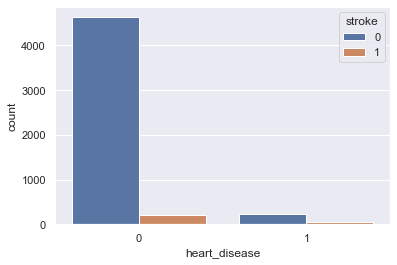

In [30]:
sns.countplot(data=ctg_df, x='heart_disease', hue='stroke')
plt.show()

In [19]:
heart_counts = ctg_df.pivot_table(index='stroke', columns='heart_disease', values='work_type',
                                   aggfunc='count',dropna=False, margins=True)

heart_counts

heart_disease,0,1,All
stroke,,,
0,4632,229,4861
1,202,47,249
All,4834,276,5110


In [20]:
heart_counts['no_heart_disease_stroke_rate'] = (heart_counts[0]/heart_counts['All'])*100
heart_counts['has_heart_disease_stroke_rate'] = (heart_counts[1]/heart_counts['All'])*100

In [21]:
heart_counts

heart_disease,0,1,All,no_heart_disease_stroke_rate,has_heart_disease_stroke_rate
stroke,,,,,
0,4632,229,4861,95.289035,4.710965
1,202,47,249,81.124498,18.875502
All,4834,276,5110,94.598826,5.401174


<h4>From this simple pivot table wecan coclude that heartdisease has an impact on stroke as of all the people who had stroke 18% had heart disease where of the people who did not have stroke oly 5 percent had heart disease. So this feature will be very useful in our model building</h4>

In [22]:
pd.get_dummies(ctg_df[['gender', 'hypertension', 'heart_disease', 'stroke']],).corr()

,hypertension,heart_disease,stroke,gender_Female,gender_Male,gender_Other
hypertension,1.000000,0.108306,0.127904,-0.021143,0.021275,-0.004597
heart_disease,0.108306,1.000000,0.134914,-0.085617,0.085717,-0.003343
stroke,0.127904,0.134914,1.000000,-0.009027,0.009117,-0.003166
gender_Female,-0.021143,-0.085617,-0.009027,1.000000,-0.999597,-0.016642
gender_Male,0.021275,0.085717,0.009117,-0.999597,1.000000,-0.011757
gender_Other,-0.004597,-0.003343,-0.003166,-0.016642,-0.011757,1.000000


<h4>Our analysis is probably correct as you can see in the correalion of different features</h4>
<h4>It shows that gender does not has much relation with stroke where heart_disease and hyper tension has a positive releation with stroke which also true in according real world. Although gender has a impact on stroke in real life it changes according to age of male and female so it does carry much with in affecting stroke with out including the age feature</h4>

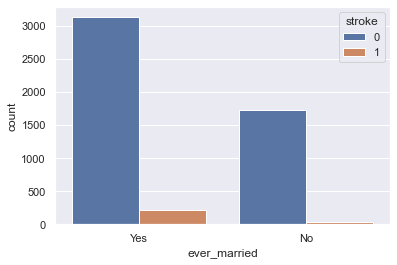

In [31]:
sns.countplot(data=ctg_df, x='ever_married', hue='stroke')
plt.show()

In [33]:
married = ctg_df.pivot_table(index='stroke', columns='ever_married', values='work_type',
                                   aggfunc='count',dropna=False, margins=True)
married

ever_married,No,Yes,All
stroke,,,
0,1728,3133,4861
1,29,220,249
All,1757,3353,5110


In [36]:
married['not_married_stroke'] = (married["No"] / married['All']) * 100
married['married_stroke_rate'] = (married['Yes'] / married['All']) * 100

In [37]:
married

ever_married,No,Yes,All,not_married_stroke,married_stroke_rate
stroke,,,,,
0,1728,3133,4861,35.548241,64.451759
1,29,220,249,11.646586,88.353414
All,1757,3353,5110,34.383562,65.616438


In [38]:
pd.get_dummies(ctg_df[['ever_married', 'stroke']],).corr()

,stroke,ever_married_No,ever_married_Yes
stroke,1.00000,-0.10834,0.10834
ever_married_No,-0.10834,1.00000,-1.00000
ever_married_Yes,0.10834,-1.00000,1.00000


<p>We can see that being married has a higher chance of having a stroke. Although age ia also a factor here. Since people who are older has a higher chance of having a stroke and they are most of the time married</p>

In [41]:
ctg_df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1


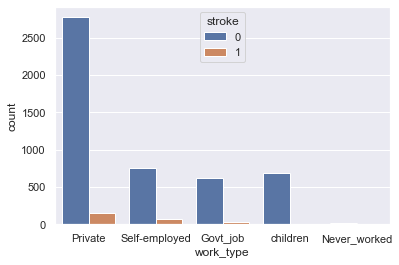

In [45]:
sns.countplot(data=ctg_df, x='work_type', hue='stroke')
plt.show()

In [69]:
work_type = ctg_df.pivot_table(index='stroke', columns='work_type', values='ever_married',
                                   aggfunc='count',dropna=False, margins=True)
work_type

work_type,Govt_job,Never_worked,Private,Self-employed,children,All
stroke,,,,,,
0,624.0,22.0,2776.0,754.0,685.0,4861
1,33.0,NaN,149.0,65.0,2.0,249
All,657.0,22.0,2925.0,819.0,687.0,5110


In [70]:
columns = work_type.columns 
for column in columns:
    if column != 'All':
        work_type[column+'_percent'] = round((work_type[column] / work_type['All'])*100, 2)
        work_type.drop(columns=[column], inplace=True)

In [71]:
work_type

work_type,All,Govt_job_percent,Never_worked_percent,Private_percent,Self-employed_percent,children_percent
stroke,,,,,,
0,4861,12.84,0.45,57.11,15.51,14.09
1,249,13.25,NaN,59.84,26.10,0.80
All,5110,12.86,0.43,57.24,16.03,13.44


In [72]:
pd.get_dummies(ctg_df[['work_type', 'stroke']],).corr()

,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
stroke,1.000000,0.002677,-0.014882,0.011888,0.062168,-0.083869
work_type_Govt_job,0.002677,1.000000,-0.025258,-0.444420,-0.167810,-0.151383
work_type_Never_worked,-0.014882,-0.025258,1.000000,-0.076081,-0.028728,-0.025915
work_type_Private,0.011888,-0.444420,-0.076081,1.000000,-0.505475,-0.455992
work_type_Self-employed,0.062168,-0.167810,-0.028728,-0.505475,1.000000,-0.172180
work_type_children,-0.083869,-0.151383,-0.025915,-0.455992,-0.172180,1.000000


<p>It does not feel like there is much realtionship between stroke and work type</p>

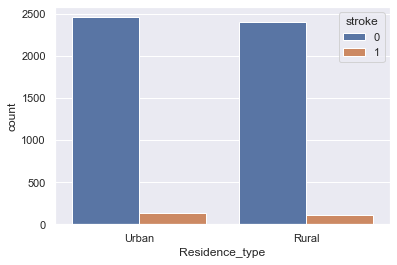

In [78]:
sns.countplot(data=ctg_df, x='Residence_type', hue='stroke')
plt.show()

In [74]:
residence = ctg_df.pivot_table(index='stroke', columns='Residence_type', values='ever_married',
                                   aggfunc='count',dropna=False, margins=True)
residence

Residence_type,Rural,Urban,All
stroke,,,
0,2400,2461,4861
1,114,135,249
All,2514,2596,5110


In [75]:
columns = residence.columns 
for column in columns:
    if column != 'All':
        residence[column+'_percent'] = round((residence[column] / residence['All'])*100, 2)
        residence.drop(columns=[column], inplace=True)

In [76]:
residence

Residence_type,All,Rural_percent,Urban_percent
stroke,,,
0,4861,49.37,50.63
1,249,45.78,54.22
All,5110,49.20,50.80


In [77]:
pd.get_dummies(ctg_df[['Residence_type', 'stroke']],).corr()

,stroke,Residence_type_Rural,Residence_type_Urban
stroke,1.000000,-0.015458,0.015458
Residence_type_Rural,-0.015458,1.000000,-1.000000
Residence_type_Urban,0.015458,-1.000000,1.000000


<p>It seems that although not by much urban people has a little bit more chances of getting a stroke although not by much</p>

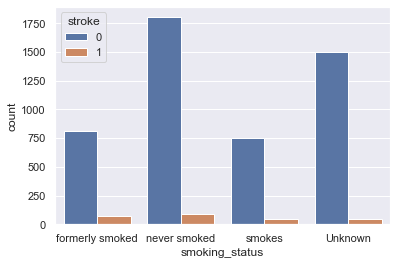

In [83]:
sns.countplot(data=ctg_df, x='smoking_status', hue='stroke')
plt.show()

In [82]:
smoking = ctg_df.pivot_table(index='stroke', columns='smoking_status', values='ever_married',
                                   aggfunc='count',dropna=False, margins=True)
smoking

smoking_status,Unknown,formerly smoked,never smoked,smokes,All
stroke,,,,,
0,1497,815,1802,747,4861
1,47,70,90,42,249
All,1544,885,1892,789,5110


In [84]:
columns = smoking.columns 
for column in columns:
    if column != 'All':
        smoking[column+'_percent'] = round((smoking[column] / smoking['All'])*100, 2)
        smoking.drop(columns=[column], inplace=True)

In [85]:
smoking

smoking_status,All,Unknown_percent,formerly smoked_percent,never smoked_percent,smokes_percent
stroke,,,,,
0,4861,30.80,16.77,37.07,15.37
1,249,18.88,28.11,36.14,16.87
All,5110,30.22,17.32,37.03,15.44


In [86]:
pd.get_dummies(ctg_df[['smoking_status', 'stroke']],).corr()

,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
stroke,1.000000,-0.055892,0.064556,-0.004129,0.008939
smoking_status_Unknown,-0.055892,1.000000,-0.301156,-0.504546,-0.281177
smoking_status_formerly smoked,0.064556,-0.301156,1.000000,-0.350934,-0.195571
smoking_status_never smoked,-0.004129,-0.504546,-0.350934,1.000000,-0.327653
smoking_status_smokes,0.008939,-0.281177,-0.195571,-0.327653,1.000000


<h4>analysing the the continuos data</h4>

In [23]:
cnt_df.isnull().sum()

age                    0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

In [24]:
cnt_df.describe()

,age,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,106.147677,28.893237,0.048728
std,22.612647,45.283560,7.854067,0.215320
min,0.080000,55.120000,10.300000,0.000000
25%,25.000000,77.245000,23.500000,0.000000
50%,45.000000,91.885000,28.100000,0.000000
75%,61.000000,114.090000,33.100000,0.000000
max,82.000000,271.740000,97.600000,1.000000


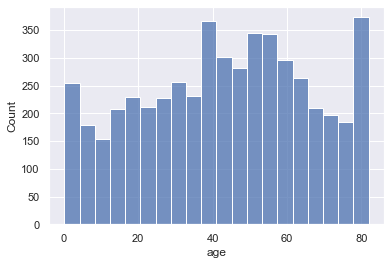

In [25]:
sns.histplot(x='age', data=cnt_df)
plt.show()

In [26]:
sns.histplot(x='age', data=cnt_df, hue='stroke', multiple='dodge')
plt.show()

NameError: name 'stroke' is not defined

In [ ]:
cnt_df.pivot_table(index='stroke', values=['age'])